In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import circlify
import pyvis

In [25]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv'
df = pd.read_csv(url)
df

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277
...,...,...,...,...,...
1156,2015,F,Linda,423,0.000219
1157,2015,F,Dorothy,395,0.000204
1158,2015,F,Deborah,346,0.000179
1159,2015,F,Patricia,346,0.000179


# Line Plot

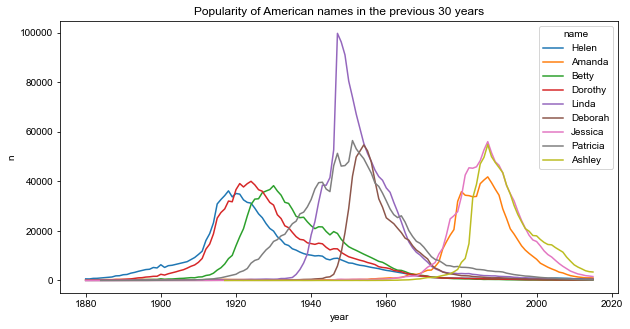

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year", y="n", hue="name", data=df)
plt.title("Popularity of American names in the previous 30 years")
sns.set_style("whitegrid")

## Highlighted

Text(1990, 52000, 'Amanda reached 3550\nbabies in 1970')

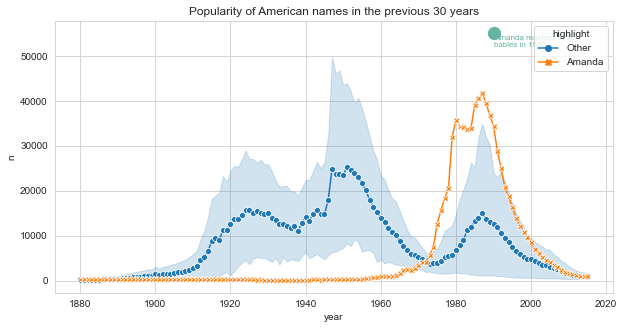

In [5]:
data = df.assign(highlight = np.where(df['name'] == 'Amanda', 'Amanda', 'Other'))

plt.figure(figsize=(10,5))
sns.lineplot(x="year", y="n", hue="highlight", style="highlight", data=data, markers=True, dashes=False)
plt.title("Popularity of American names in the previous 30 years")
sns.set_style("whitegrid")

plt.scatter(x=1990, y=55000, s=150, color='#69b3a2', marker='o')
plt.text(1990, 52000, 'Amanda reached 3550\nbabies in 1970', color='#69b3a2', fontsize=8)


# Area Chart

<Figure size 720x360 with 0 Axes>

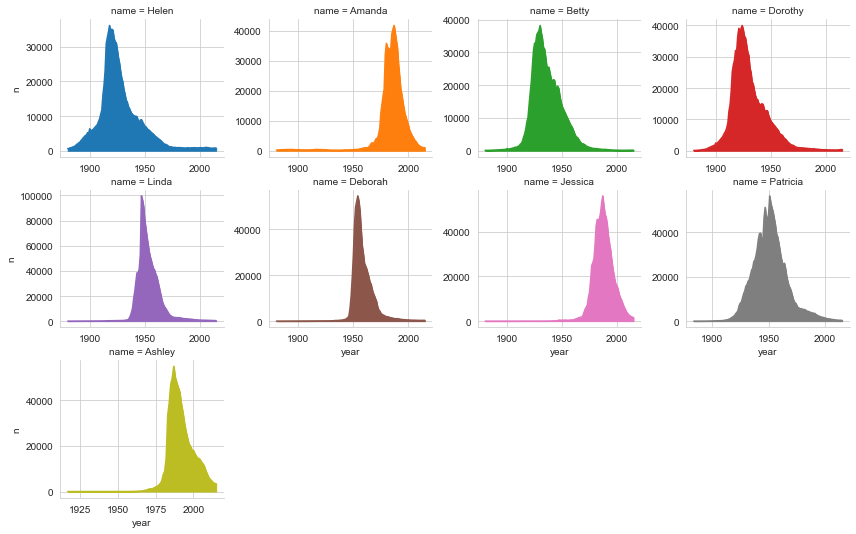

In [12]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(data, col="name", col_wrap=4, sharex=False, sharey=False,hue='name')
g.map(sns.lineplot, "year", "n", estimator=None)
g.map(plt.fill_between, "year", "n")
plt.subplots_adjust(top=0.8)

# Stack Area Chart

In [13]:
fig = px.area(data_frame=df, x='year', y='n', color='name')
fig.update_layout(title="Popularity of American names in the previous 30 years",
                 showlegend=False)
fig.show()

## Percent

In [14]:
data = df.assign(freq = df.groupby(['year'])['n'].apply(lambda x: x/x.sum()))

fig = px.area(data_frame=data, x='year', y='freq', color='name')
fig.update_layout(title="Popularity of American names in the previous 30 years",
                 showlegend=False)
fig.show()

# Stream Graph

In [61]:
names = df['name'].unique()
years = df['year'].unique()
a = np.empty((len(df['name'].unique()),len(df['year'].unique())))

for i in range(len(df['name'].unique())):
    for j in range(len(df['year'].unique())):
        if (np.where((df['name'] == names[i]) & (df['year'] == years[j]))[0]).size == 0:
            a[i][j] = 0
        else:
            a[i][j] = df['n'][np.where((df['name'] == names[i]) & (df['year'] == years[j]))[0][0]]
population_by_continent = {}
for i , key in enumerate(names):
    population_by_continent[key] = a[i]

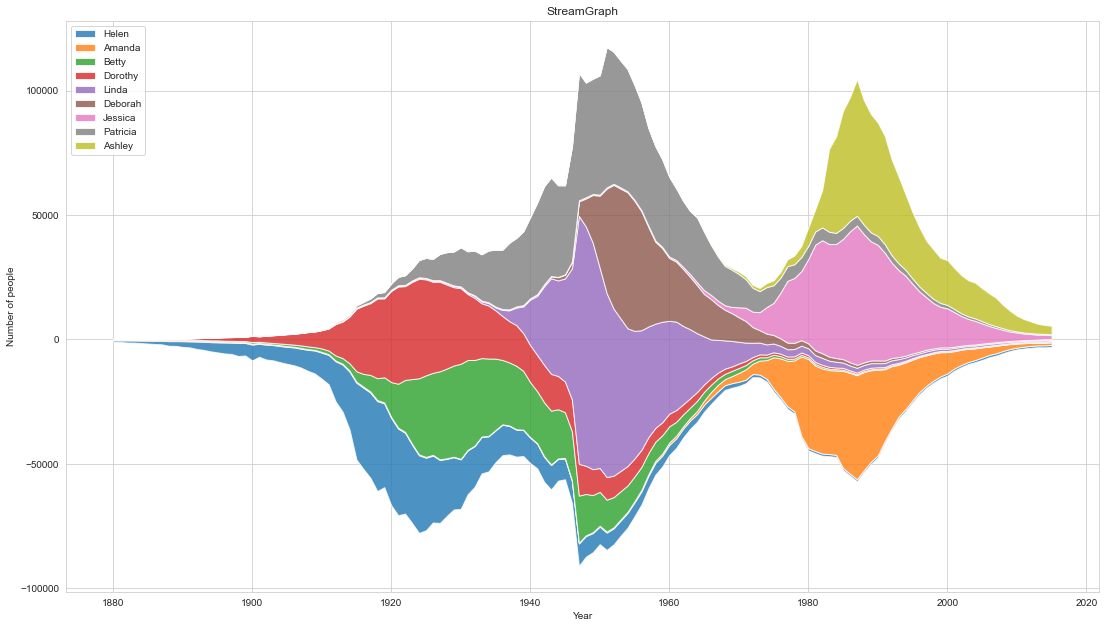

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.stackplot(df['year'].unique(), population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8,baseline='wiggle')
ax.legend(loc='upper left')
ax.set_title('StreamGraph')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people')

plt.show()

# PCA

In [69]:
import pandas as pd
from sklearn.decomposition import PCA
#from plotnine import *

# replace NA with 0
wide = df.fillna(0).drop('sex',axis = 1)

# select all columns except the first
wide = wide.iloc[:,1:]

# transpose the dataframe
wide = wide.T

# Perform PCA
pca = PCA()
pca.fit(wide)

# A dataframe with position of individuals on PCs
data = pd.DataFrame(pca.transform(wide), columns=['PC1','PC2'], index=wide.index)
data
# Plot
# (ggplot(data)
#  + geom_text(aes(x='PC1', y='PC2', label='index'), alpha=.4, size=3)
#  + geom_hline(yintercept=0, size=.2)
#  + geom_vline(xintercept=0, size=.2)
#  + coord_equal()
# )

ValueError: could not convert string to float: 'Helen'